In [22]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

### Some theory

The Ising Hamiltonian: $$\mathcal{H} = -J \sum_{\langle i j \rangle} S_{i} S_{j}.$$

Theory behind this:
1. $J$ > 0 (describes the strengh of exchange interaction)
2. Each spin direction may be either "up" (+1)or "down" (-1)
3. $dE$ calculates using nearest-neighbor interaction only

In a matrix implementation the neighbours of the vertice $(i,j)$ are $(i − 1, j), (i, j − 1), (i + 1, j), (i, j + 1)$


<img src="Image004.png" alt="Drawing" style="width: 200px;"/>

### Main steps in Monte-Carlo implementation

1. Create an initial configuration of N spins. (2D matrix)
2. Flip the spin randomly in a chosen place.
3. Calculate the change in energy $dE$(by neighbours).
4. If $dE$ < 0, accept the move. Otherwise accept the move with probability $exp^{-dE/T}$. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat steps from 2 to 4


In [44]:
def initialstate(N):
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def flipping(configuration, beta):  
    for i in range(N):
        for j in range(N):
                n = np.random.randint(0, N)
                m = np.random.randint(0, N)
                spin =  configuration[n, m] #choose random point in a matrix
                nb = configuration[(n+1)%N,m] + configuration[n,(m+1)%N] + configuration[(n-1)%N,m] + configuration[n,(m-1)%N]
                de = 2*spin*nb
                if de < 0:
                    spin *= -1
                elif rand() < np.exp(-de*beta):
                    spin *= -1
                configuration[n, m] = spin
    return configuration


def Energy(configuration):
    energy = 0
    for i in range(len(configuration)):
        for j in range(len(configuration)):
            S = configuration[i,j]
            nb = configuration[(i+1)%N, j] + configuration[i,(j+1)%N] + configuration[(i-1)%N, j] + configuration[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def Magn(configuration):
    magnitization = np.sum(configuration)
    return magnitization

Flipping spins we have a loop with $N^{2}$ iterations --> the complexity of our implementation is $O(N^{2})$

The system undergoes a 2nd order phase transition at the critical temperature Tc . For temperatures less than Tc , the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than Tc , the system is in the disordered or the paramagnetic state.
The two-dimensional model with no external field was analytically solved by Lars Onsager(1944),
showing that the model undergoes a phase transition at the critical temperature given by $T_{c} = \frac{2J}{kln(\sqrt2 + 1)}$. To make temperature dimensionless we chose J=1 and set Boltzmann’s constant to k=1. So according to analitical solution $T_{c} = 2.27$

In [45]:
temperature = 20  #  number of temperature points
eqSteps = 500  #  number of steps for equilibration
mcSteps = 1000 #  number of steps for calculation

T  = np.linspace(1, 3, temperature); #temperature range
E,M = np.zeros(temperature), np.zeros(temperature) 

In [46]:
%time
import time
list_of_conficurations = []
Ens = [i for i in range(1,20)]
for N in Ens:
    n1  = 1.0/(mcSteps*N*N)
    start_time = time.time()
    for tt in range(temperature):
        E1 = M1 = 0
        config = initialstate(N)
        #beta = 1/T
        iT=1.0/T[tt]
    
        for i in range(eqSteps):         # equilibration
            flipping(config, iT)           

        for i in range(mcSteps):
            flipping(config, iT)           
            Ene = Energy(config)     # calculate the energy
            Mag = Magn(config)        # calculate the magnetisation

            E1 = E1 + Ene
            M1 = M1 + Mag

        E[tt] = n1*E1
        M[tt] = n1*M1
        
    execution_time = time.time() - start_time
    list_of_conficurations.append(execution_time)  

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


### Check the complexity numerically

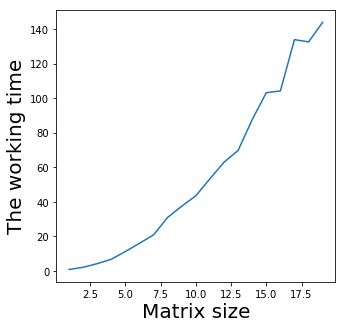

In [47]:
t = plt.figure(figsize=(5, 5)); 
plt.plot(Ens, list_of_conficurations)
plt.xlabel("Matrix size", fontsize=20);
plt.ylabel("The working time", fontsize=20); plt.axis('tight');

The complexity of the whole algorithm is $O(N^{2})$

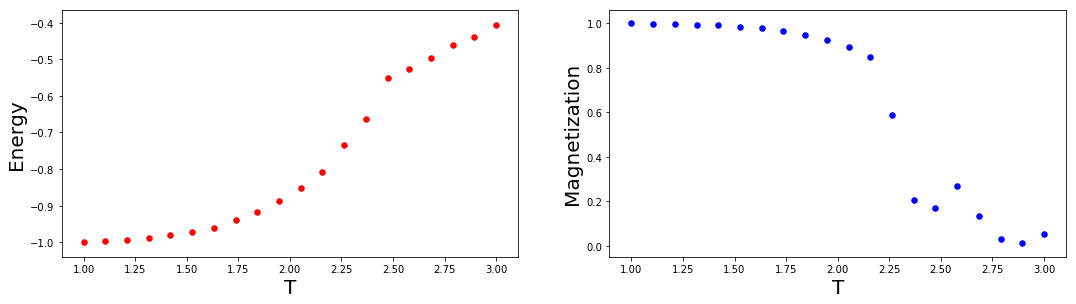

In [48]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=30, marker='o', color='Red')
plt.plot()
plt.xlabel("T", fontsize=20);
plt.ylabel("Energy", fontsize=20); plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=30, marker='o', color='Blue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("Magnetization", fontsize=20); plt.axis('tight');


Accorning to theoretical solution $T_{c} = 2.27$. Monte-Carlo simulation confirms this

### References
1. Определение температуры фазового перехода в модели Изинга с дальним взаимодействием методом Монте-Карло. А.А. Бирюков, Я.В. Дегтярева.
2. Monte Carlo investigation of the Ising model. Tobin Fricke.